**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

#LSTMs

##**Part 1:  LSTM on synthetic datasets**   

In Part 1, you will implement and compare different neural network architectures for time series prediction. You will work with synthetic temperature data that includes daily and seasonal patterns. By the end of this assignment, you will understand how different neural network architectures perform on sequence data and gain practical experience implementing these models using TensorFlow.

- Learning Objectives   
  - Implement and compare dense neural networks and recurrent neural networks (LSTMs)
  - Understand how to process and prepare time series data for neural networks
  - Evaluate model performance for time series prediction tasks
  - Ensure reproducibility in neural network experiments

- Background   
  Time series prediction is essential in many domains, including weather forecasting, stock market analysis, and natural language processing. In this coding project, you will work with synthetic temperature data that exhibits both daily (24-hour) and seasonal (365-day) patterns. Your task is to implement three different neural network architectures:
    - Simple dense (fully connected) neural network
    - Basic LSTM (Long Short-Term Memory) network
    - Stacked LSTM network with two LSTM layers
  You will then compare their performance on predicting future temperature values based on past sequences.

- Provided Code   
  You will be provided with the following utility functions:
  - *set_seeds*: Sets random seeds for reproducibility
  - *generate_temperature_data*: Creates synthetic temperature data
  - *prepare_sequences*: Prepares sequence data for training
  - *plot_training_history*: Visualizes model training and predictions


In [1]:
# Helper functions
# No coding needed - you may use this function to plot your model training history.
# Do not change the code in this cell.

def plot_training_history(history, y_true, y_pred, title):
    """Plot training and validation metrics."""
    plt.figure(figsize=(15, 4))

    # Plot loss
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 3, 2)
    # Convert MSE to accuracy (1 - normalized_error)
    train_acc = 1 - np.array(history.history['loss']) / np.max(history.history['loss'])
    val_acc = 1 - np.array(history.history['val_loss']) / np.max(history.history['val_loss'])
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot predictions vs actual
    plt.subplot(1, 3, 3)
    plt.plot(y_true[:100], label='Actual', alpha=0.7)
    plt.plot(y_pred[:100], label='Predicted', alpha=0.7)
    plt.title(f'{title} - Temperature Prediction')
    plt.xlabel('Time Step')
    plt.ylabel('Temperature')
    plt.legend()

    plt.tight_layout()
    plt.show()

**Implement the following functions**   

  1.
    ```python
    def create_dense_model(sequence_length, seed=42)
    ```  
     Implement a simple dense neural network for comparison.   
     - The model should flatten the input sequence (hint: use GlobalAveragePooling1D).  
     - The model should include at least two dense hidden layers.  
     - Use the provided deterministic initialization for reproducibility.  
     - The output layer should have a single neuron.  
    Parameters:   
      - *sequence_length* (int): The number of time steps in each input sequence.  
      - *seed* (int): Random seed for reproducibility.   a

    Returns:    
      - compiled TensorFlow Sequential model.     

  2.
    ```python
    def create_lstm_model(sequence_length, seed=42)
    ```   
     Implement a basic LSTM model for time series prediction.   
     - The model should include one LSTM layer with at least 50 units.   
     - Add at least one dense layer after the LSTM layer.   
     - Use the provided deterministic initialization for reproducibility.    
     - The output layer should have a single neuron.    
    Parameters:   
     - *sequence_length* (int): The number of time steps in each input sequence.  
     - *seed* (int): Random seed for reproducibility.   

    Returns:   
     - compiled TensorFlow Sequential model.  

  3.
    ```python
    def create_stacked_lstm_model(sequence_length, seed=42)
    ```   
     Implement a stacked LSTM model with two LSTM layers.   
     - The model should include two LSTM layers.    
     - The first LSTM layer should return sequences for the second LSTM layer.    
     - Add at least one dense layer after the LSTM layers.    
     - Use the provided deterministic initialization for reproducibility.    
     - The output layer should have a single neuron.   
    Parameters:   
     - *sequence_length* (int): The number of time steps in each input sequence.  
     - *seed* (int): Random seed for reproducibility.  

    Returns:   
     - compiled TensorFlow Sequential model.  

  Note, the example usage for the models from 1-3 is:

          models = {
              'Dense': create_dense_model(sequence_length, seed=seed),
              'LSTM': create_lstm_model(sequence_length, seed=seed),
              'Stacked LSTM': create_stacked_lstm_model(sequence_length, seed=seed)
          }

  4.
    ```python
    def train_and_evaluate(model, X_train, y_train, X_val, y_val, scaler, title="Model", seed=42)
    ```   
     Implement a function to train and evaluate a model.    
     - Train the model for 50 epochs with a batch size of 32.    
     - Use the validation data for model validation during training.    
     - Disable shuffling for reproducibility.    
     - Calculate Mean Squared Error (MSE) and R-squared accuracy.    
     - Ensure reproducibility by using the provided seeds.    
    Parameters:    
     - *model* The neural network model to train.    
     - *X_train* (numpy.ndarray): Training input sequences.   
     - *y_train* (numpy.ndarray): Training target values.   
     - *X_val* (numpy.ndarray): Validation input sequences.    
     - *y_val* (numpy.ndarray): Validation target values.    
     - *scaler* The scaler used to normalize the data.    
     - *title* (str): Title for plotting.    
     - *seed* (int): Random seed for reproducibility.   
    Returns:   
     - *history* Training history object.   
     - *y_pred_orig* (numpy.ndarray): Model predictions (in original scale).    
     - *y_val_orig* (numpy.ndarray): Actual values (in original scale).    
     - *mse* (float): Mean Squared Error on validation data.   
     - *accuracy* (float): R-squared accuracy on validation data.    

  Example usage:
  
          history, y_pred, y_true, mse, accuracy = train_and_evaluate(
                      model, X_train, y_train, X_val, y_val, scaler, name, seed=seed
          )

<br>

Important Tips   
    - Reproducibility: Ensure all random operations use the provided seeds for reproducibility.  
    - Model Architecture: Pay attention to the input shapes and output dimensions of each layer.  
    - Layer Initialization: Use deterministic initialization for weights (e.g., *kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed)*).  
    - Training Parameters: Use fixed batch sizes and disable shuffling for reproducibility.   

In [2]:
#WRITE YOUR CODE IN THIS CELL USING THE INSTRUCTIONS AND GUIDE BELOW

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GlobalAveragePooling1D, Bidirectional
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os
from tensorflow.keras.optimizers import Adam


def create_dense_model(sequence_length, seed=42):
    """Create a simple dense model for comparison."""

    # Set seed for model initialization.  Do not change.
    tf.random.set_seed(seed)

    #Create Dense sequential model
    #Flatten the input sequence using GlobalAveragePooling1D.
    #1st Dense layer with 50 nodes, relu activation,
    #   Set the kernel initializer (for reproducibility) to kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed)
    #2nd Dense layer with 20 nodes, relu activation,
    #   Set the kernel initializer (for reproducibility) to kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed)
    #3rd (output) Dense layer with 1 nodes, no activation (see keras documentation if no activation is specified),
    #   Set the kernel initializer (for reproducibility) to kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed)
    model = Sequential([
        Dense(50, activation='relu', input_shape=(sequence_length, 1), kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed)),
        GlobalAveragePooling1D(),
        Dense(20, activation='relu', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed)),
        Dense(1, activation=None, kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed))
    ])
    return model


def create_lstm_model(sequence_length, seed=42):
    """Create a basic LSTM model."""

    # Set seed for model initialization.  Do not change.
    tf.random.set_seed(seed)

    #Create LSTM sequential model by adding LSTM layer in front of Dense layers
    #1st LSTM layer with 50 nodes
    #   Set the kernel initializer (for reproducibility) to kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed)
    #   Set the recurrent initializer to ensure gradient stability to recurrent_initializer=tf.keras.initializers.orthogonal(seed=seed))
    #2nd Dense layer with 20 nodes, relu activation,
    #   Set the kernel initializer (for reproducibility) to kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed)
    #3rd (output) Dense layer with 1 nodes, no activation (see keras documentation if no activation is specified),
    #   Set the kernel initializer (for reproducibility) to kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed)
    model = Sequential([
        LSTM(50, return_sequences=False, input_shape=(sequence_length, 1), kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed), recurrent_initializer=tf.keras.initializers.orthogonal(seed=seed)),
        Dense(20, activation='relu', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed)),
        Dense(1, activation=None, kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed))
    ])
    return model


def create_stacked_lstm_model(sequence_length, seed=42):
    """Create a stacked LSTM model."""

    # Set seed for model initialization.  Do not change.
    tf.random.set_seed(seed)

    #Create stacked LSTM sequential model by adding 2 LSTM layers in front of Dense layers
    #1st LSTM layer with 50 nodes
    #   Set the kernel initializer (for reproducibility) to kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed)
    #   Set the recurrent initializer to ensure gradient stability to recurrent_initializer=tf.keras.initializers.orthogonal(seed=seed))
    #2nd LSTM layer with 50 nodes
    #   Set the kernel initializer (for reproducibility) to kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed))
    #   Set the recurrent initializer to ensure gradient stability to recurrent_initializer=tf.keras.initializers.orthogonal(seed=seed))
    #3rd Dense layer with 20 nodes, relu activation,
    #   Set the kernel initializer (for reproducibility) to kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed)
    #4th (output) Dense layer with 1 nodes, no activation (see keras documentation if no activation is specified),
    #   Set the kernel initializer (for reproducibility) to kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed)
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(sequence_length, 1), kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed), recurrent_initializer=tf.keras.initializers.orthogonal(seed=seed)),
        LSTM(50, return_sequences=False, kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed), recurrent_initializer=tf.keras.initializers.orthogonal(seed=seed)),
        Dense(20, activation='relu', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed)),
        Dense(1, activation=None, kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed))
    ])
    return model


def train_and_evaluate(model, X_train, y_train, X_val, y_val, scaler, title="Model", seed=42):
    """Train and evaluate a model."""

    # Set seed for training. Do not change.
    tf.random.set_seed(seed)
    np.random.seed(seed)

    print(f"\nTraining {title}...")
    print(f"Input shapes - X: {X_train.shape}, y: {y_train.shape}")

    # Create a deterministic callback for reproducibility.  Do not change.
    class DeterministicCallback(tf.keras.callbacks.Callback):
        def on_epoch_begin(self, epoch, logs=None):
            tf.random.set_seed(seed + epoch)


    # Train the modela
    #   Set the number of epochs to 50, batch size to 32.
    #   Set the verbose flag to view training progress.
    #   Set shuffle parameter to False for reproducibility.
    #   Set callbacks parameter to [DeterministicCallback()] for reproducibility.
    history = model.fit(
        X_train, y_train,
        epochs=50, batch_size=32,
        verbose=1,
        shuffle=False,
        callbacks=[DeterministicCallback()],
        validation_data=(X_val, y_val)
    )

    # Make predictions
    y_pred = model.predict(X_val)

    #Process the output predictions.  You may reuse the reshap and inverse transform code here.
    # Reshape predictions and actual values for inverse transform
    y_pred = y_pred.reshape(-1, 1)
    y_val_reshaped = y_val.reshape(-1, 1)

    # Inverse transform
    y_pred_orig = scaler.inverse_transform(y_pred).flatten()
    y_val_orig = scaler.inverse_transform(y_val_reshaped).flatten()


    # Calculate metrics:
    #   Mean squared error: mean(y validation original - y prediction original)**2
    #   Accuracy: 1 - mse/variance(y validation original)
    # Hint, calculate these directly with numpy functions and y_val_orig, y_pred_orig.
    mse = np.mean((y_val_orig - y_pred_orig)**2)
    accuracy = 1- mse/np.var(y_val_orig)


    # Plot results using provided plotting function
    plot_training_history(history, y_val_orig, y_pred_orig, title)

    return history, y_pred_orig, y_val_orig, mse, accuracy

Validation Testing - run the following code cell to verify your code.   
Do not modify the code, simply run the cell, check that your doctests passed, and use the outputs to answer the reflection questions.

Generating temperature data...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training Dense...
Input shapes - X: (6983, 24, 1), y: (6983,)
Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 2.1221e-04 - loss: 0.1043 - val_accuracy: 6.6845e-04 - val_loss: 0.0345
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 2.1221e-04 - loss: 0.0346 - val_accuracy: 6.6845e-04 - val_loss: 0.0345
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 2.1221e-04 - loss: 0.0343 - val_accuracy: 6.6845e-04 - val_loss: 0.0344
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 2.1221e-04 - loss: 0.0342 - val_accuracy: 6.6845e-04 - val_loss: 0.0344
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 2.1221e-04 - loss: 0.0341 - val_accuracy: 6.6845e-04 - val_loss: 0.0344
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 2.1221e-04 - loss: 0.0340 - val_accuracy: 6.6845e-04 - val_loss: 0.0343
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 2.1221e-04 - loss: 0.0339 - val_accuracy: 6.6845e-04 - va

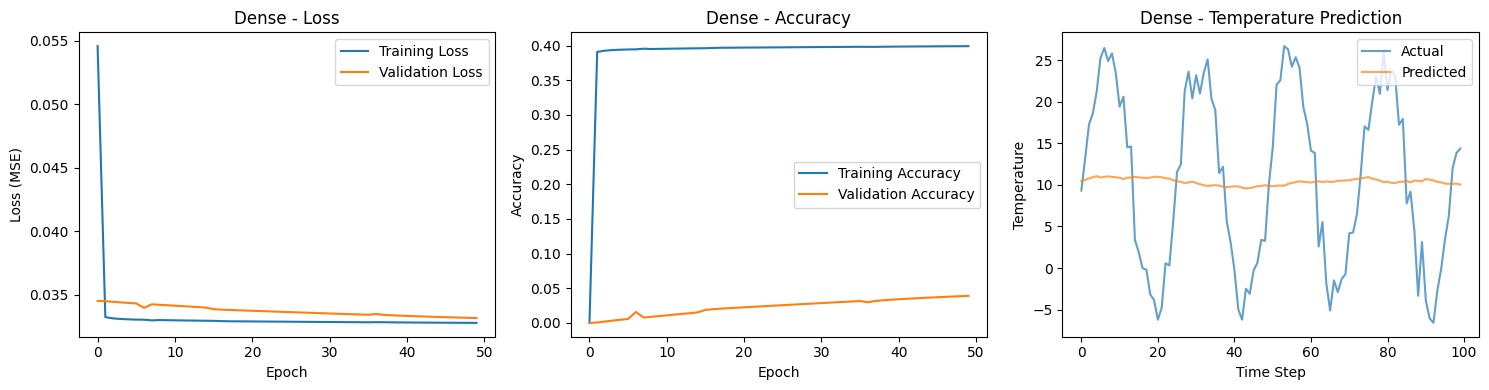

Dense
MSE: 117.990677416689
Accuracy: 0.03331027937177178

Training LSTM...
Input shapes - X: (6983, 24, 1), y: (6983,)
Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 2.1221e-04 - loss: 0.0998 - val_accuracy: 6.6845e-04 - val_loss: 0.0036
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 2.1221e-04 - loss: 0.0028 - val_accuracy: 6.6845e-04 - val_loss: 0.0037
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 2.1221e-04 - loss: 0.0027 - val_accuracy: 6.6845e-04 - val_loss: 0.0035
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 2.1221e-04 - loss: 0.0025 - val_accuracy: 6.6845e-04 - val_loss: 0.0037
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 2.1221e-04 - loss: 0.0025 - val_accuracy: 6.6845e-04 - val_loss: 0.0032
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 2.1221e-04 - loss: 0.0023 - val_accuracy: 6.6845e-04 - val_loss: 0.0030
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc

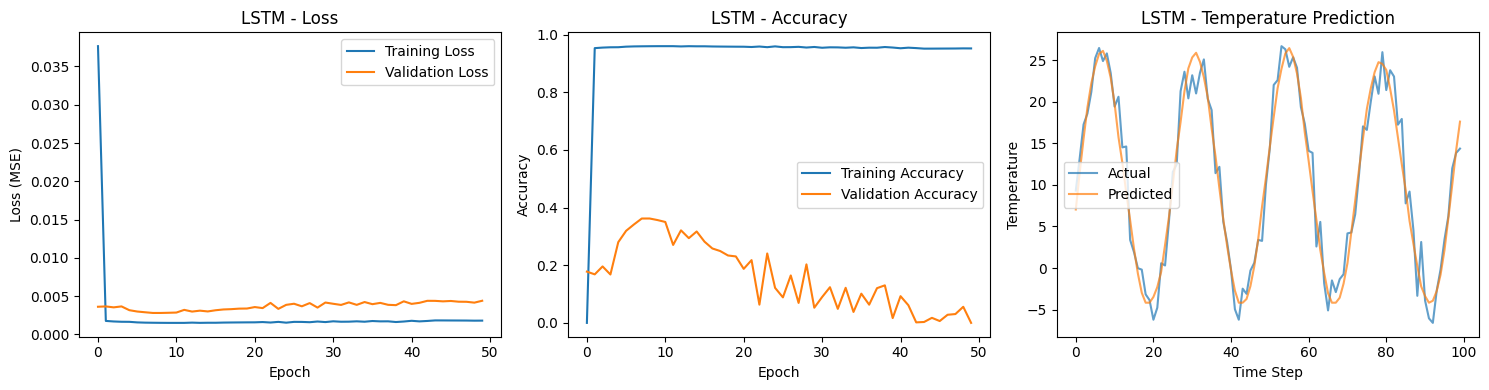

LSTM
MSE: 15.649170758341072
Accuracy: 0.871787391685028

Training Stacked LSTM...
Input shapes - X: (6983, 24, 1), y: (6983,)
Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 2.1221e-04 - loss: 0.0505 - val_accuracy: 6.6845e-04 - val_loss: 0.0099
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 2.1221e-04 - loss: 0.0074 - val_accuracy: 6.6845e-04 - val_loss: 0.0073
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 2.1221e-04 - loss: 0.0046 - val_accuracy: 6.6845e-04 - val_loss: 0.0062
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 2.1221e-04 - loss: 0.0040 - val_accuracy: 6.6845e-04 - val_loss: 0.0054
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 2.1221e-04 - loss: 0.0035 - val_accuracy: 6.6845e-04 - val_loss: 0.0049
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 2.1221e-04 - loss: 0.0032 - val_accuracy: 6.6845e-04 - val_loss: 0.0042
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms

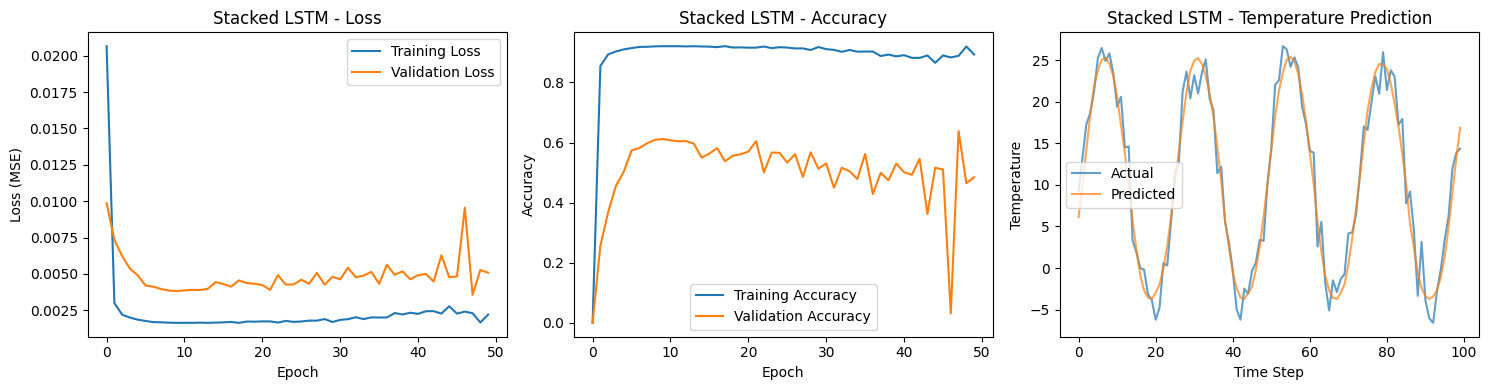

Stacked LSTM
MSE: 18.079572991579212
Accuracy: 0.851875268902937
Dense MSE: 117.990677416689
Dense Accuracy: 0.03331027937177178
LSTM MSE: 15.649170758341072
LSTM Accuracy: 0.871787391685028
Stacked LSTM MSE: 18.079572991579212
Stacked LSTM Accuracy: 0.851875268902937
**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    np.isclose(results['Dense']['mse'], 117.33981323767615, atol=1e-02)
Expected:
    np.True_
Got:
    np.False_
**********************************************************************
1 items had failures:
   1 of   6 in __main__
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=6)

In [3]:
#Validation tests - do not modify code in this cell

import random

def set_seeds(seed=42):
    """Set seeds for reproducibility."""
    # Set Python's random seed
    random.seed(seed)

    # Set NumPy's random seed
    np.random.seed(seed)

    # Set TensorFlow's random seed
    tf.random.set_seed(seed)

    # Set environment variables for deterministic operations
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

    # Set TensorFlow session config for determinism
    tf.config.experimental.enable_op_determinism()

    # Set the global TensorFlow configuration
    physical_devices = tf.config.list_physical_devices('GPU')
    if len(physical_devices) > 0:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)

def generate_temperature_data(n_samples=10000, seed=42):
    """Generate synthetic temperature data with daily and seasonal patterns."""
    # Set seed specifically for this function
    np.random.seed(seed)

    time = np.arange(n_samples)

    # Daily pattern (24-hour cycle)
    daily = 15 * np.sin(2 * np.pi * time / 24)

    # Seasonal pattern (365-day cycle)
    seasonal = 10 * np.sin(2 * np.pi * time / (24 * 365))

    # Add random noise with fixed seed
    noise = np.random.normal(0, 2, n_samples)

    # Combine patterns
    temperatures = 20 + daily + seasonal + noise

    return temperatures

def prepare_sequences(data, sequence_length, train_split=0.7, val_split=0.15, seed=42):
    """Prepare sequences and split into train, validation, and test sets."""
    # Set seed for reproducibility in this function
    np.random.seed(seed)

    # Scale the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences
    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:(i + sequence_length), 0])
        y.append(scaled_data[i + sequence_length, 0])

    X = np.array(X)
    y = np.array(y)

    # Reshape X to (samples, timesteps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Calculate split points
    train_size = int(len(X) * train_split)
    val_size = int(len(X) * val_split)

    # Split data
    X_train = X[:train_size]
    y_train = y[:train_size]

    X_val = X[train_size:train_size + val_size]
    y_val = y[train_size:train_size + val_size]

    X_test = X[train_size + val_size:]
    y_test = y[train_size + val_size:]

    return (X_train, y_train), (X_val, y_val), (X_test, y_test), scaler


#Runner
# Set random seeds
seed = 42
set_seeds(seed)

# Generate temperature data
print("Generating temperature data...")
temperatures = generate_temperature_data(seed=seed)

# Prepare sequences
sequence_length = 24  # 24 hours
(X_train, y_train), (X_val, y_val), (X_test, y_test), scaler = prepare_sequences(
    temperatures, sequence_length, seed=seed
)

# Create and train models
models = {
    'Dense': create_dense_model(sequence_length, seed=seed),
    'LSTM': create_lstm_model(sequence_length, seed=seed),
    'Stacked LSTM': create_stacked_lstm_model(sequence_length, seed=seed)
}

# Compile models
for model in models.values():
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
        loss='mse',
        metrics=['accuracy']  # Changed from MAE to accuracy
    )

# Train and evaluate each model
results = {}
for name, model in models.items():
    history, y_pred, y_true, mse, accuracy = train_and_evaluate(
        model, X_train, y_train, X_val, y_val, scaler, name, seed=seed
    )
    results[name] = {'history': history, 'predictions': y_pred, 'actual': y_true, 'mse': mse, 'accuracy': accuracy}
    print(name)
    print('MSE:', results[name]['mse'])
    print('Accuracy:', results[name]['accuracy'])
print('Dense MSE:', results['Dense']['mse'])
print('Dense Accuracy:', results['Dense']['accuracy'])
print('LSTM MSE:', results['LSTM']['mse'])
print('LSTM Accuracy:', results['LSTM']['accuracy'])
print('Stacked LSTM MSE:', results['Stacked LSTM']['mse'])
print('Stacked LSTM Accuracy:', results['Stacked LSTM']['accuracy'])


# Doctest validation
import doctest
'''
  >>> np.isclose(results['Dense']['mse'], 117.33981323767615, atol=1e-02)
  np.True_
  >>> np.isclose(results['Dense']['accuracy'], 0.03864276601522809, atol=1e-02)
  np.True_
  >>> np.isclose(results['LSTM']['mse'], 15.649170758341072, atol=1e-02)
  np.True_
  >>> np.isclose(results['LSTM']['accuracy'], 0.871787391685028, atol=1e-02)
  np.True_
  >>> np.isclose(results['Stacked LSTM']['mse'], 18.079572991579212, atol=1e-02)
  np.True_
  >>> np.isclose(results['Stacked LSTM']['accuracy'], 0.851875268902937, atol=1e-02)
  np.True_
'''
doctest.testmod()


### Part 1 Reflection Questions   

Answer the following reflection questions:
1. The Dense neural network performed poorly compared to both LSTM models. Why might a Dense network struggle with time series prediction, even though it has access to the same 24-hour window of temperature data?
2.  The Stacked LSTM (two LSTM layers) performed slightly worse than the single LSTM, despite being a more complex model. What are some potential reasons for this, and what does it tell us about choosing model architectures?
3. Looking at the temperature predictions plot, you'll notice that all models (even the poor-performing Dense network) capture some basic pattern in the data. What might each model be learning about temperature patterns, and how does this relate to their architectures?


1. The Dense neural network performed poorly compared to both LSTM models. Why might a Dense network struggle with time series prediction, even though it has access to the same 24-hour window of temperature data?

   **Ans**: Dense is not a time-series model, which means that it would treat the 24-hour data as each independent points, but not time series, so it would lose information given by the periodicity of a time series.

2. The Stacked LSTM (two LSTM layers) performed slightly worse than the single LSTM, despite being a more complex model. What are some potential reasons for this, and what does it tell us about choosing model architectures?

   **Ans:** Two-layer LSTM may make the model too complex, less efficient, or cause over-fitting problem.  So when we are choosing models, it is not always better to choose the more complex model.

3. Looking at the temperature predictions plot, you'll notice that all models (even the poor-performing Dense network) capture some basic pattern in the data. What might each model be learning about temperature patterns, and how does this relate to their architectures?

​**Ans:** The LSTM and Stacked LSTM can capture the periodicity of the temperature data, while the Dense model can only capture the general trend (look like "average") of the temperature data. This is because Dense data is not a time-series model, but LSTM models are time-series models.

##**Part 2:  NLP Architecture Comparison**   

In this part, you will compare the performance of different neural network architectures for text classification tasks. You will implement and evaluate four architectures:   
- Dense Network (Baseline): Using only embedding and dense layers
- LSTM Network: Adding a single LSTM layer
- Bidirectional LSTM Network: Using a bidirectional LSTM layer
- Double Bidirectional LSTM Network: Implementing two stacked bidirectional LSTM layers

You will run experiments on two different datasets:
- The Sarcasm Detection Dataset: Contains headlines labeled as sarcastic or non-sarcastic
- The IMDB Movie Review Dataset: Contains movie reviews labeled as positive or negative

Learning Objectives
- Understand the impact of recurrent architectures on NLP tasks
- Compare unidirectional vs. bidirectional approaches in sequence modeling
- Analyze how model complexity affects learning on different text classification tasks
- Develop skills in implementing and evaluating various deep learning architectures
- Interpret model performance using quantitative and qualitative methods

Tasks

1: Understanding the Code Base.  
   Review the provided code and understand:   
   - The data preprocessing pipeline
   - The existing model architecture implementations
   - The evaluation methodology
   - How hyperparameters are configured for each model and dataset

2: Model Implementation and Hyperparameter Tuning.  
   Complete the implementation of all four model architectures:   
   - Dense Network
   - Single LSTM model
   - Bidirectional LSTM model
   - Double Bidirectional LSTM model

   For each architecture, experiment with:  
    - Embedding dimensions
    - Learning rates
    - Number of epochs

   Analyze how different hyperparameters affect:
    - Training speed
    - Convergence behavior
    - Final performance
    - Overfitting tendencies

3: Experiments and Analysis.  Run experiments on both datasets (already set up in the code) and compare model performances using:  
  - Training and validation accuracy
  - Training and validation loss
  - Training time
  - Performance on test examples
  Create visualizations to support your analysis

4: Written Report.  Write a report (2-3 pages) containing:
  - Introduction: Brief overview of the architectures tested and datasets used
  - Methodology: Description of models, hyperparameters, and evaluation approach
  - Results: Presentation of performance metrics and visualizations
  - Analysis:  Compare the four architectures - what are the strengths and weaknesses of each?
  - How does performance differ between the Sarcasm and IMDB datasets?
  - What factors influence the differences in performance?
  - Is the additional complexity of bidirectional and stacked models justified by their performance?

  Conclusions: Summary of findings and recommendations for which architecture works best in which situations

**Submission Requirements**
  - Your completed Python code notebook
  - Your written report (PDF format)
  - Any additional visualizations or analysis you performed


In [4]:
# Helper functions and environment setup.
# No coding needed in this cell - just run this cell to set up your simulation environment.
# Do not change the code in this cell.


import numpy as np
import tensorflow as tf
import random
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from nltk.corpus import stopwords
import nltk
import json
import requests
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard
from tensorboard.plugins import projector
import io
import time

# Make sure stopwords are available
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Set all random seeds for reproducibility
def set_seeds(seed=42):
    """Set seeds for reproducibility."""
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

    # Configure TensorFlow for deterministic operations
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

    # Set session config for reproducibility
    tf.keras.utils.set_random_seed(seed)

# Load the sarcasm dataset
def load_sarcasm_dataset():
    """Download and load the sarcasm dataset"""
    url = "https://storage.googleapis.com/learning-datasets/sarcasm.json"
    response = requests.get(url)
    dataset = response.json()

    headlines = []
    labels = []
    for item in dataset:
        headlines.append(item['headline'])
        labels.append(item['is_sarcastic'])

    return headlines, labels

# Load the IMDB dataset
def load_imdb_dataset(num_words=10000):
    """Load the IMDB dataset from Keras"""
    (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

    # Convert indices back to words
    word_index = imdb.get_word_index()
    reverse_word_index = {value: key for key, value in word_index.items()}

    # Convert train sequences to text
    train_texts = []
    for sequence in train_data:
        words = [reverse_word_index.get(i - 3, '?') for i in sequence]
        train_texts.append(' '.join(words))

    # Convert test sequences to text
    test_texts = []
    for sequence in test_data:
        words = [reverse_word_index.get(i - 3, '?') for i in sequence]
        test_texts.append(' '.join(words))

    # Combine train and test data for consistent preprocessing
    all_texts = train_texts + test_texts
    all_labels = np.concatenate([train_labels, test_labels])

    print(f"Total texts: {len(all_texts)}")
    print(f"Total labels: {len(all_labels)}")

    return all_texts, all_labels

# Visualize word embeddings
def save_embeddings_for_projector(model, tokenizer, log_dir='logs', min_freq=5):
    """Save embeddings for visualization in TensorBoard Projector"""
    # Clear existing log directory
    if os.path.exists(log_dir):
        import shutil
        shutil.rmtree(log_dir)
    os.makedirs(log_dir)

    # Get embedding weights and print dimensions
    embedding_layer = model.layers[0]
    weights = embedding_layer.get_weights()[0]
    num_vectors = len(weights)
    print(f"\nEmbedding layer info:")
    print(f"Number of vectors in embedding layer: {num_vectors}")
    print(f"Embedding dimension: {weights.shape[1]}")

    # Print tokenizer info
    print(f"\nTokenizer info:")
    print(f"Vocabulary size: {len(tokenizer.word_index)}")
    print(f"Num words parameter: {tokenizer.num_words}")

    # Save vectors
    vectors_path = os.path.join(log_dir, 'vectors.tsv')
    with open(vectors_path, 'w', encoding='utf-8') as f:
        for vector in weights:
            f.write('\t'.join([str(x) for x in vector]))
            f.write('\n')

    # Create metadata matching number of vectors exactly
    metadata_words = []
    # Add special tokens
    metadata_words.append('PAD')  # index 0
    metadata_words.append('OOV')  # index 1

    # Get word-index pairs and sort by index
    word_idx_pairs = sorted([(word, idx) for word, idx in tokenizer.word_index.items()
                            if idx < num_vectors], key=lambda x: x[1])

    # Add remaining words in order
    for word, idx in word_idx_pairs:
        if idx > 1:  # Skip PAD and OOV as they're already added
            metadata_words.append(word)

    print(f"\nProcessed word counts:")
    print(f"Special tokens: 2")
    print(f"Regular words: {len(word_idx_pairs)}")
    print(f"Total metadata words: {len(metadata_words)}")

    # Save metadata
    metadata_path = os.path.join(log_dir, 'metadata.tsv')
    with open(metadata_path, 'w', encoding='utf-8') as f:
        for word in metadata_words:
            f.write(f'{word}\n')

    # Verify files
    with open(vectors_path, 'r') as f:
        vector_lines = f.readlines()
    with open(metadata_path, 'r') as f:
        metadata_lines = f.readlines()

    print(f"\nFile verification:")
    print(f"Number of vector lines: {len(vector_lines)}")
    print(f"Number of metadata lines: {len(metadata_lines)}")

    # Set up config
    config = projector.ProjectorConfig()
    embedding = config.embeddings.add()
    embedding.tensor_name = "embedding"
    embedding.metadata_path = os.path.abspath(metadata_path)
    projector.visualize_embeddings(log_dir, config)

    # Save checkpoint
    tensor_path = os.path.join(log_dir, 'embedding.ckpt')
    checkpoint = tf.train.Checkpoint(embedding=tf.Variable(weights))
    checkpoint.save(tensor_path)

    if len(vector_lines) != len(metadata_lines):
        print(f"\nWARNING: Mismatch between vectors and metadata!")
        print(f"This needs to be fixed before the projector will work correctly.")

# Plot training history
def plot_training_history(history, model_name="Model"):
    """Plot training & validation accuracy and loss values"""
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

# Compare all models on training history
def plot_model_comparison(histories, model_names):
    """Plot a comparison of training histories for multiple models"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy
    for history, name in zip(histories, model_names):
        ax1.plot(history.history['val_accuracy'], label=name)

    ax1.set_title('Validation Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend()

    # Plot loss
    for history, name in zip(histories, model_names):
        ax2.plot(history.history['val_loss'], label=name)

    ax2.set_title('Validation Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend()

    plt.tight_layout()
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Implement the following functions:**   

<br>

1.  Data Preprocessing - Preprocesses text data for neural network training by tokenizing, sequencing, and padding the inputs. Optionally remove stopwords from the input texts.   
     ```python
     def preprocess_data(texts, labels, max_length=100, vocab_size=10000, remove_stopwords=True)
     ```
      - Parameters:   
        *texts* (list): List of text strings to be processed.   
        *labels* (array): Array of labels corresponding to each text.   
        *max_length* (int, optional): Maximum sequence length after padding. Default is 100.   
        *vocab_size* (int, optional): Maximum vocabulary size for tokenization. Default is 10000.   
        *remove_stopwords* (bool, optional): Whether to remove stopwords. Default is True.   
      - Returns:   
        *padded_sequences* (numpy.ndarray): Processed and padded sequences.   
        *labels* (numpy.ndarray): Processed labels.   
        *tokenizer* (Tokenizer): The fitted tokenizer object for later use.   
      - Example usage:   
      ```python
          train_sequences, train_labels, tokenizer = preprocess_data(
              texts=headlines,
              labels=sarcasm_labels,
              max_length=50,
              vocab_size=5000,
              remove_stopwords=True
          )
        ```

2.  Model Creation - Creates Dense, LSTM, Bidirectional LSTM, and stacked (double) bidirectional LSTM models.    

    (a) Dense model:  baseline model with only dense layers.   
    ```python
    def create_dense_model(vocab_size, embedding_dim=16):
    ```
    - Parameters:  
      *vocab_size* (int): Size of the vocabulary (typically from tokenizer)
      *embedding_dim* (int, optional): Dimensionality of the embedding layer. Default is 16.
    - Returns:    
      *model* (tf.keras.Sequential): Compiled Dense Network model
    - Architecture:  
      Embedding layer,  
      Global Average Pooling,  
      Dense layer (24 units, ReLU activation),  
      Output layer (1 unit, sigmoid activation),  
    - Example usage:  
    ```python
        dense_model = create_dense_model(vocab_size=10000)
    ```
    <br>

    (b) LSTM model:  single LSTM layer for capturing sequential patterns in text.   
    ```python
    def create_lstm_model(vocab_size, embedding_dim=16):
    ```
    - Parameters:  
      *vocab_size* (int): Size of the vocabulary (typically from tokenizer)
      *embedding_dim* (int, optional): Dimensionality of the embedding layer. Default is 16.
    - Returns:    
      *model* (tf.keras.Sequential): Compiled Dense Network model
    - Architecture:  
      Embedding layer,  
      LSTM layer (128 units),  
      Dense layer (32 units, ReLU activation),  
      Output layer (1 unit, sigmoid activation),  
    - Example usage:  
    ```python
        lstm_model = create_lstm_model(vocab_size=10000, embedding_dim=64)
    ```

   <br>

    (c) Bidirectional LSTM model:  single bidirectional LSTM for processing sequences in both forward and backward directions.   
    ```python
    def create_bidirectional_lstm_model(vocab_size, embedding_dim=16):
    ```
    - Parameters:  
      *vocab_size* (int): Size of the vocabulary (typically from tokenizer)
      *embedding_dim* (int, optional): Dimensionality of the embedding layer. Default is 16.
    - Returns:    
      *model* (tf.keras.Sequential): Compiled Dense Network model
    - Architecture:  
      Embedding layer,  
      Bidirectional LSTM layer (embedding_dim units in each direction),  
      Dense layer (24 units, ReLU activation),  
      Output layer (1 unit, sigmoid activation),  
    - Example usage:  
    ```python
        bi_lstm_model = create_bidirectional_lstm_model(vocab_size=10000)
    ```

   <br>

    (d) Stacked (double) bidirectional LSTM model:  double bidirectional LSTM for capturing hierarchical patterns.   
    ```python
    def create_double_bidirectional_lstm_model(vocab_size, embedding_dim=16):
    ```
    - Parameters:  
      *vocab_size* (int): Size of the vocabulary (typically from tokenizer)
      *embedding_dim* (int, optional): Dimensionality of the embedding layer. Default is 16.
    - Returns:    
      *model* (tf.keras.Sequential): Compiled Dense Network model
    - Architecture:  
      Embedding layer,  
      Bidirectional LSTM layer (embedding_dim units in each direction, returns sequences),  
      Second Bidirectional LSTM layer (embedding_dim units in each direction),  
      Dense layer (24 units, ReLU activation),  
      Output layer (1 unit, sigmoid activation),  
    - Example usage:  
    ```python
        double_bi_lstm_model = create_double_bidirectional_lstm_model(
                vocab_size=10000,
                embedding_dim=32
        )
    ```

3.  Model Training - Trains and evaluates a model with the specified parameters.    

    ```python
    def train_model(model, train_sequences, train_labels, val_sequences, val_labels,
                    epochs=10, batch_size=32, learning_rate=0.00001, model_name="model"):
    ```
    - Parameters:   
      *model* (tf.keras.Model): The model to train.   
      *train_sequences* (numpy.ndarray): Preprocessed training sequences.   
      *train_labels* (numpy.ndarray): Training labels.   
      *val_sequences* (numpy.ndarray): Preprocessed validation sequencesa.   
      *val_labels* (numpy.ndarray): Validation labels.       
      *epochs* (int, optional): Number of training epochs. Default is 10.   
      *batch_size* (int, optional): Batch size for training. Default is 32.    
      *learning_rate* (float, optional): Learning rate for Adam optimizer. Default is 0.00001.    
      *model_name* (str, optional): Name identifier for the model. Default is "model".    
    - Returns:    
      *history* (History): Keras History object containing training metrics.  
      *model* (tf.keras.Model): The trained model.   
      *training_time* (float): Time taken to train the model in seconds.   
    - Example usage (for bidirectional LSTM model):  
    ```python
        history, trained_model, train_time = train_model(
            model=bi_lstm_model,  
            train_sequences=train_sequences,  
            train_labels=train_labels,  
            val_sequences=val_sequences,
            val_labels=val_labels,
            epochs=15,
            batch_size=64,
            learning_rate=0.0001,
            model_name="Bidirectional LSTM"
        )
    ```


In [6]:
#WRITE YOUR CODE IN THIS CELL USING THE INSTRUCTIONS AND GUIDE BELOW

# Preprocess the text data
def preprocess_data(texts, labels, max_length=100, vocab_size=10000, remove_stopwords=True):
    """Preprocess the text data with optional stopword removal"""
    set_seeds()  # Set seeds for reproducibility

    #Intialized empty list
    filtered_texts = []

    #Remove stopwords based on input parameter, remove_stopwords
    if remove_stopwords:
        # Define stopwords
        STOP_WORDS = set(stopwords.words('english'))
        CUSTOM_STOPS = {'says', 'said', 'would', 'could', 'should', 'will', 'may', 'one', 'new', 'time',
                        'first', 'last', 'latest', 'next', 'best', 'way', 'day', 'today', 'tomorrow',
                        'week', 'year', 'years', 'weeks', 'days', 'month', 'months'}
        STOP_WORDS.update(CUSTOM_STOPS)

        # Filter stopwords
        for text in texts:
            words = text.split()
            filtered_words = [word for word in words if word.lower() not in STOP_WORDS]
            filtered_text = ' '.join(filtered_words)
            filtered_texts.append(filtered_text)


    else:
        filtered_texts = texts

    # Create a Tokenizer then do the following:
    #    map the texts to tokens (fit on the filtered text)
    #    convert it to sequences,
    #    pad the sequences to create same length (use post padding and post truncating).
    # Use Keras Tokenizer (https://keras.io/keras_hub/api/tokenizers/tokenizer/)
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(filtered_texts)
    sequences = tokenizer.texts_to_sequences(filtered_texts)
    padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

    return np.array(padded_sequences), np.array(labels), tokenizer


# Model creation functions - One for each architecture
def create_dense_model(vocab_size, embedding_dim=16):
    """Create a baseline model with dense layers only"""

    #Set the seeds and keras initializer for reproducibility - do not change
    set_seeds()
    initializer = tf.keras.initializers.GlorotUniform(seed=42)

    #Create a Dense model as defined in the preceeding text cell.
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            embeddings_initializer=initializer,
            name='embedding'
        ),

       tf.keras.layers.GlobalAveragePooling1D(),

      tf.keras.layers.Dense(24, activation='relu', kernel_initializer=initializer),

      tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=initializer)

    ])

    return model

def create_lstm_model(vocab_size, embedding_dim=16):
    """Create a model with a single LSTM layer"""

    #Set the seeds and keras initializer for reproducibility - do not change
    set_seeds()
    initializer = tf.keras.initializers.GlorotUniform(seed=42)

    #Create an LSTM model as defined in the preceeding text cell.
    model = tf.keras.Sequential([
            # Embedding layer with its initializer set to initializer (above), name it 'embedding'
            tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, embeddings_initializer=initializer, name='embedding'),

            # LSTM layer with 128 units, glorot_uniform kernel initialization, orthogonal recurrent initialization,
            # tanh and sigmoid activation as discussed in the lecture,
            # and set the kernel_constraint=tf.keras.constraints.MaxNorm(3), recurrent_constraint=tf.keras.constraints.UnitNorm()
            # for stability and reproducibility.
            tf.keras.layers.LSTM(128, activation='tanh',
                                 recurrent_activation='sigmoid',
                                 kernel_initializer=initializer,
                                 recurrent_initializer=tf.keras.initializers.Orthogonal(seed=42),
                                 kernel_constraint=tf.keras.constraints.MaxNorm(3),
                                 recurrent_constraint=tf.keras.constraints.UnitNorm(),
                                 return_sequences=False # Add this line
                                ),

            # Dense layer with 32 units, ReLU activation, and
            # set kernel_initializer=initializer, kernel_constraint=tf.keras.constraints.MaxNorm(3)
            # for stability and reproducibility.
            tf.keras.layers.Dense(32, activation='relu', kernel_initializer=initializer, kernel_constraint=tf.keras.constraints.MaxNorm(3)),

            # Dense layer with 1 unit, Sigmoid activation, and
            # set kernel_initializer=initializer for stability and reproducibility.

            tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=initializer)
            ])

    return model

def create_bidirectional_lstm_model(vocab_size, embedding_dim=16):
    """Create a model with a bidirectional LSTM layer"""

    #Set the seeds and keras initializer for reproducibility - do not change
    set_seeds()
    initializer = tf.keras.initializers.GlorotUniform(seed=42)

    #Create an bidirectional LSTM model as defined in the preceeding text cell.
    model = tf.keras.Sequential([
            # Embedding layer with its initializer set to initializer (above), name it 'embedding'
            tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, embeddings_initializer=initializer, name='embedding'),

            #Bidirectional LSTM layer
            tf.keras.layers.Bidirectional(LSTM(embedding_dim, return_sequences=False)), # Change return_sequences to False

            # Dense layer with 24 units, ReLU activation, and
            # set kernel_initializer=initializer, kernel_constraint=tf.keras.constraints.MaxNorm(3)
            # for stability and reproducibility.
            tf.keras.layers.Dense(24, activation='relu', kernel_initializer=initializer),

            # Dense layer with 1 unit, Sigmoid activation, and
            # set kernel_initializer=initializer for stability and reproducibility.
            tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=initializer) # Add initializer
    ])
    return model

def create_double_bidirectional_lstm_model(vocab_size, embedding_dim=16):
    """Create a model with two bidirectional LSTM layers"""

    #Set the seeds and keras initializer for reproducibility - do not change
    set_seeds()
    initializer = tf.keras.initializers.GlorotUniform(seed=42)

    #Create an stacked (double) bidirectional LSTM model as defined in the preceeding text cell.
    model = tf.keras.Sequential([

            # Embedding layer with its initializer set to initializer (above), name it 'embedding'
            tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, embeddings_initializer=initializer, name='embedding'),

            #Bidirectional LSTM layer
            #Set return_sequences True for the correct output shape
            tf.keras.layers.Bidirectional(LSTM(embedding_dim, return_sequences=True)),

            #Bidirectional LSTM layer
            tf.keras.layers.Bidirectional(LSTM(embedding_dim, return_sequences=False)), # Add return_sequences=False

            # Dense layer with 24 units, ReLU activation, and
            # set kernel_initializer=initializer, kernel_constraint=tf.keras.constraints.MaxNorm(3)
            # for stability and reproducibility.
            tf.keras.layers.Dense(24, activation='relu', kernel_initializer=initializer),

            # Dense layer with 1 unit, Sigmoid activation, and
            # set kernel_initializer=initializer for stability and reproducibility.
            tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output') # Add activation and name
    ])

    return model


# Train a model
def train_model(model, train_sequences, train_labels, val_sequences, val_labels,
               epochs=10, batch_size=32, learning_rate=0.00001, model_name="model"):

    """Train a model and return the history"""
    set_seeds()  # Set seeds for reproducibility

    # Define Adam optimizer
    # Set learning rate to the input parameter learning_rate,
    # Set beta 1 and beta 2 to 0.9 and 0.999 respectively,
    # Set amsgrad to False (do not apply AMSGrad)
    adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)

    # Compile the model
    # Set loss to Binary Crossentropy,
    # Set the optimizer to adam as configured above,
    # Set the metrics to 'accuracy'
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy']) # Correct the typo here

    # Define checkpoint callback
    checkpoint_path = f'{model_name.lower().replace(" ", "_")}_best.keras'
    callbacks = [
        tf.keras.callbacks.ModelCheckpoint(
            checkpoint_path,
            save_best_only=True,
            monitor='val_accuracy'
        )
    ]

    # Train the model
    # Record the time to train (start)
    start_time = time.time()

    # Fit the model
    # Set the inputs to the training sequences and labels,
    # Set the number of iterations to the input parameter epochs,
    # Set the batch size to the input parameter batch_size,
    # Set the validation (test) data to the validation sequences and labels
    # Set verbose to 1 for console printouts of the training progress
    # Set shuffle to False for reproducibility
    # Set callbacks to the callbacks checkpoints configured above.
    history = model.fit(
        train_sequences,
        train_labels,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(val_sequences, val_labels),
        verbose=1,
        shuffle=False,
        callbacks=callbacks)

    # Record the time to train (end)
    training_time = time.time() - start_time

    # Evaluate the model
    loss, accuracy = model.evaluate(val_sequences, val_labels, verbose=0)

    print(f"\n{model_name} Validation Accuracy: {accuracy:.4f}")
    print(f"Training time: {training_time:.2f} seconds")

    return history, model, training_time


Sarcasm dataset configurations:
Learning rates: {'Dense Network': 0.0001, 'LSTM Network': 1e-05, 'Bidirectional LSTM Network': 1e-05, 'Double Bidirectional LSTM Network': 1e-05}
Embedding dimensions: {'Dense Network': 16, 'LSTM Network': 64, 'Bidirectional LSTM Network': 64, 'Double Bidirectional LSTM Network': 64}
Epochs: {'Dense Network': 30, 'LSTM Network': 20, 'Bidirectional LSTM Network': 15, 'Double Bidirectional LSTM Network': 15}

Running comparison on Sarcasm dataset with optimized hyperparameters:
  Dense Network: embedding_dim=16, epochs=30, lr=0.0001
  LSTM Network: embedding_dim=64, epochs=20, lr=1e-05
  Bidirectional LSTM Network: embedding_dim=64, epochs=15, lr=1e-05
  Double Bidirectional LSTM Network: embedding_dim=64, epochs=15, lr=1e-05

Initial configuration:
Learning rates: {'Dense Network': 0.0001, 'LSTM Network': 1e-05, 'Bidirectional LSTM Network': 1e-05, 'Double Bidirectional LSTM Network': 1e-05}
Embedding dimensions: {'Dense Network': 16, 'LSTM Network': 64,

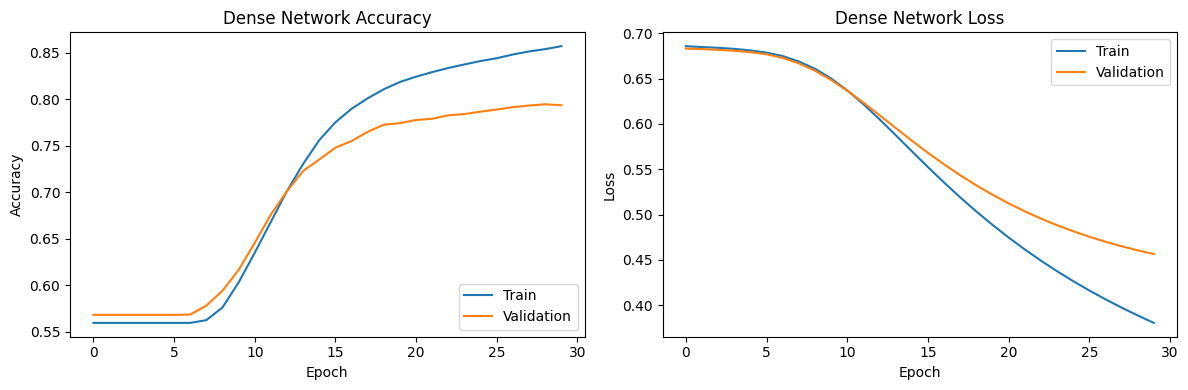


Training LSTM Network...
Embedding dimension: 64
Using learning rate: 1e-05 for LSTM Network
Training for 20 epochs
Epoch 1/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 118s 173ms/step - accuracy: 0.5596 - loss: 0.6882 - val_accuracy: 0.5680 - val_loss: 0.6836
Epoch 2/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 113s 170ms/step - accuracy: 0.5991 - loss: 0.6599 - val_accuracy: 0.6934 - val_loss: 0.5778
Epoch 3/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 113s 169ms/step - accuracy: 0.7594 - loss: 0.5198 - val_accuracy: 0.7370 - val_loss: 0.5382
Epoch 4/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 113s 169ms/step - accuracy: 0.8099 - loss: 0.4472 - val_accuracy: 0.7495 - val_loss: 0.5234
Epoch 5/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 113s 170ms/step - accuracy: 0.8420 - loss: 0.3956 - val_accuracy: 0.7587 - val_loss: 0.5141
Epoch 6/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 110s 164ms/step - accuracy: 0.8639 - loss: 0.3561 - val_accuracy: 0.7653 - val_loss: 0.5139
Epoch 7/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 112s 167ms/step - accuracy: 0.8826 - loss: 0.3249 -

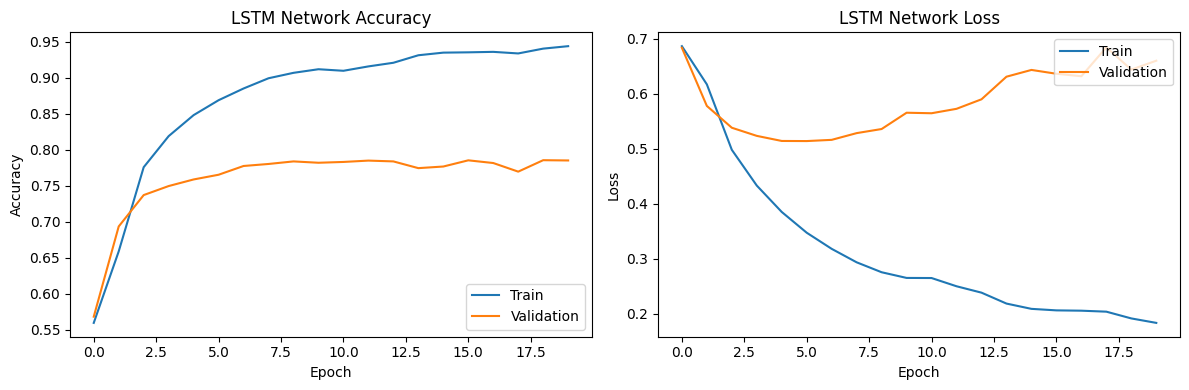


Training Bidirectional LSTM Network...
Embedding dimension: 64
Using learning rate: 1e-05 for Bidirectional LSTM Network
Training for 15 epochs
Epoch 1/15
668/668 ━━━━━━━━━━━━━━━━━━━━ 81s 114ms/step - accuracy: 0.5596 - loss: 0.6904 - val_accuracy: 0.5680 - val_loss: 0.6839
Epoch 2/15
668/668 ━━━━━━━━━━━━━━━━━━━━ 82s 114ms/step - accuracy: 0.5596 - loss: 0.6850 - val_accuracy: 0.5680 - val_loss: 0.6814
Epoch 3/15
668/668 ━━━━━━━━━━━━━━━━━━━━ 75s 112ms/step - accuracy: 0.5596 - loss: 0.6826 - val_accuracy: 0.5680 - val_loss: 0.6780
Epoch 4/15
668/668 ━━━━━━━━━━━━━━━━━━━━ 77s 115ms/step - accuracy: 0.5596 - loss: 0.6780 - val_accuracy: 0.5680 - val_loss: 0.6710
Epoch 5/15
668/668 ━━━━━━━━━━━━━━━━━━━━ 76s 114ms/step - accuracy: 0.5596 - loss: 0.6688 - val_accuracy: 0.5680 - val_loss: 0.6589
Epoch 6/15
668/668 ━━━━━━━━━━━━━━━━━━━━ 76s 113ms/step - accuracy: 0.5653 - loss: 0.6537 - val_accuracy: 0.6009 - val_loss: 0.6431
Epoch 7/15
668/668 ━━━━━━━━━━━━━━━━━━━━ 76s 114ms/step - accuracy: 0.

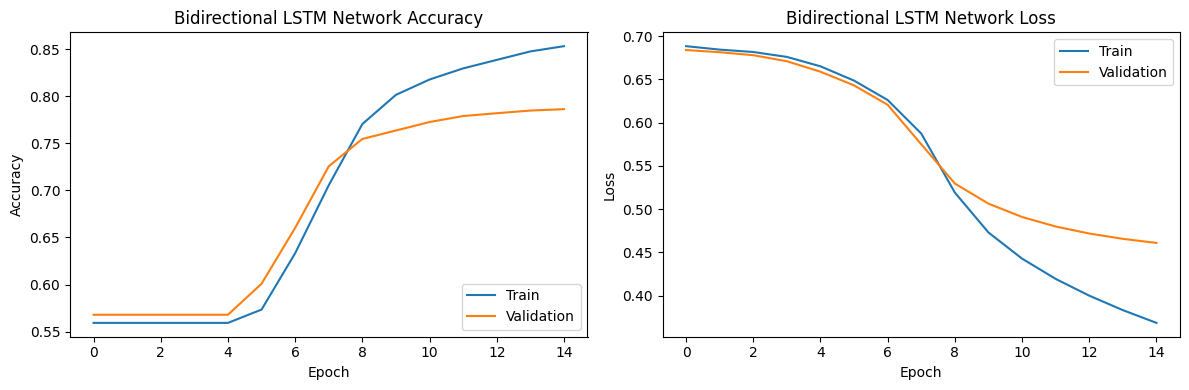


Training Double Bidirectional LSTM Network...
Embedding dimension: 64
Using learning rate: 1e-05 for Double Bidirectional LSTM Network
Training for 15 epochs
Epoch 1/15
668/668 ━━━━━━━━━━━━━━━━━━━━ 168s 239ms/step - accuracy: 0.5596 - loss: 0.6897 - val_accuracy: 0.5680 - val_loss: 0.6831
Epoch 2/15
668/668 ━━━━━━━━━━━━━━━━━━━━ 159s 237ms/step - accuracy: 0.5596 - loss: 0.6849 - val_accuracy: 0.5680 - val_loss: 0.6816
Epoch 3/15
668/668 ━━━━━━━━━━━━━━━━━━━━ 161s 241ms/step - accuracy: 0.5596 - loss: 0.6828 - val_accuracy: 0.5680 - val_loss: 0.6772
Epoch 4/15
668/668 ━━━━━━━━━━━━━━━━━━━━ 159s 238ms/step - accuracy: 0.5596 - loss: 0.6757 - val_accuracy: 0.5717 - val_loss: 0.6527
Epoch 5/15
668/668 ━━━━━━━━━━━━━━━━━━━━ 158s 237ms/step - accuracy: 0.6438 - loss: 0.6185 - val_accuracy: 0.7626 - val_loss: 0.5289
Epoch 6/15
668/668 ━━━━━━━━━━━━━━━━━━━━ 158s 237ms/step - accuracy: 0.8213 - loss: 0.4634 - val_accuracy: 0.7785 - val_loss: 0.4832
Epoch 7/15
668/668 ━━━━━━━━━━━━━━━━━━━━ 205s 241m

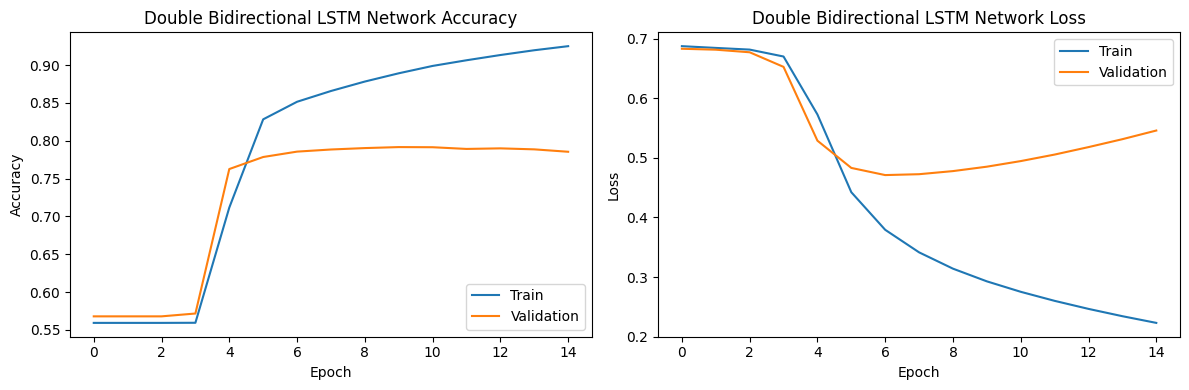

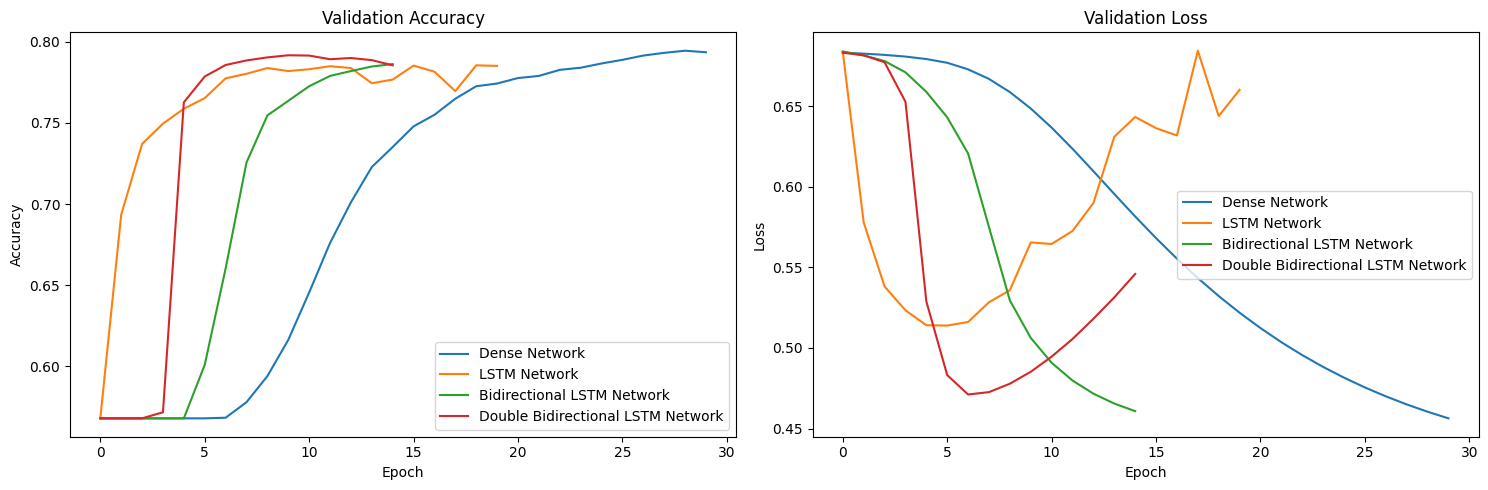


Test predictions:

Text: Scientists cure cancer, world peace achieved
  Dense Network: 0.3318 (Negative)
  LSTM Network: 0.0367 (Negative)


  Bidirectional LSTM Network: 0.3236 (Negative)


  Double Bidirectional LSTM Network: 0.3377 (Negative)

Text: Local man wins lottery, plans to spend it all on cat food
  Dense Network: 0.9577 (Positive)
  LSTM Network: 0.9713 (Positive)
  Bidirectional LSTM Network: 0.9267 (Positive)
  Double Bidirectional LSTM Network: 0.9526 (Positive)

Text: Breaking: Water is wet, scientists confirm
  Dense Network: 0.7731 (Positive)
  LSTM Network: 0.8613 (Positive)
  Bidirectional LSTM Network: 0.8451 (Positive)
  Double Bidirectional LSTM Network: 0.9532 (Positive)

Model Performance Summary:
                                   final_train_acc  final_val_acc  \
Dense Network                               0.8570         0.7935   
LSTM Network                                0.9440         0.7851   
Bidirectional LSTM Network                  0.8531         0.7862   
Double Bidirectional LSTM Network           0.9250         0.7855   

                                   best_val_acc  final_train_loss  \
Dense Network                            0.

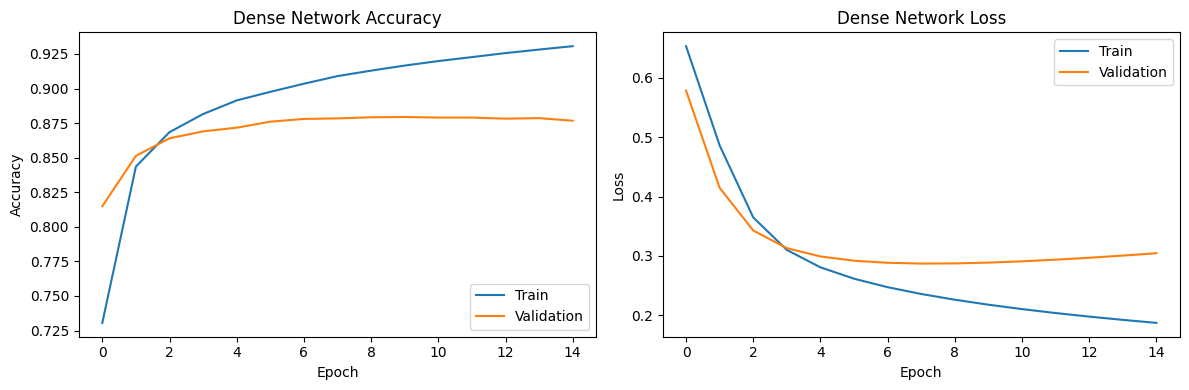


Training LSTM Network...
Embedding dimension: 64
Using learning rate: 1e-05 for LSTM Network
Training for 10 epochs
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 197s 156ms/step - accuracy: 0.5678 - loss: 0.6640 - val_accuracy: 0.7825 - val_loss: 0.4762
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 195s 156ms/step - accuracy: 0.8073 - loss: 0.4326 - val_accuracy: 0.8334 - val_loss: 0.3843
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 209s 161ms/step - accuracy: 0.8565 - loss: 0.3478 - val_accuracy: 0.8484 - val_loss: 0.3537
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 201s 160ms/step - accuracy: 0.8789 - loss: 0.3034 - val_accuracy: 0.8547 - val_loss: 0.3430
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 200s 159ms/step - accuracy: 0.8952 - loss: 0.2739 - val_accuracy: 0.8564 - val_loss: 0.3411
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 199s 157ms/step - accuracy: 0.9075 - loss: 0.2514 - val_accuracy: 0.8570 - val_loss: 0.3453
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 226s 176ms/step - accuracy: 0.9159 - 

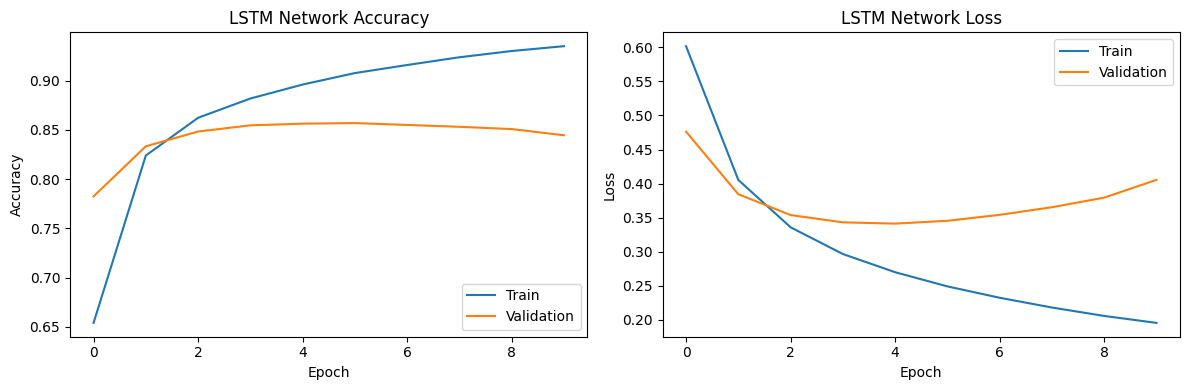


Training Bidirectional LSTM Network...
Embedding dimension: 64
Using learning rate: 1e-05 for Bidirectional LSTM Network
Training for 10 epochs
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 110ms/step - accuracy: 0.5048 - loss: 0.6930 - val_accuracy: 0.5121 - val_loss: 0.6922
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 108ms/step - accuracy: 0.5401 - loss: 0.6857 - val_accuracy: 0.7355 - val_loss: 0.5492
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 108ms/step - accuracy: 0.7921 - loss: 0.4917 - val_accuracy: 0.8318 - val_loss: 0.4162
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 108ms/step - accuracy: 0.8408 - loss: 0.3910 - val_accuracy: 0.8590 - val_loss: 0.3739
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 106ms/step - accuracy: 0.8686 - loss: 0.3314 - val_accuracy: 0.8702 - val_loss: 0.3231
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 108ms/step - accuracy: 0.8935 - loss: 0.2745 - val_accuracy: 0.8749 - val_loss: 0.3134
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 136s 109m

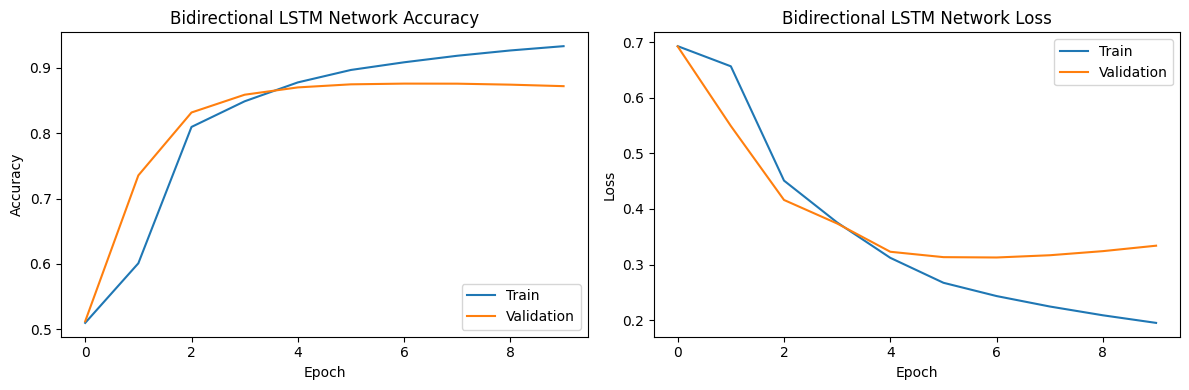


Training Double Bidirectional LSTM Network...
Embedding dimension: 64
Using learning rate: 1e-05 for Double Bidirectional LSTM Network
Training for 10 epochs
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 288s 224ms/step - accuracy: 0.5087 - loss: 0.6930 - val_accuracy: 0.6018 - val_loss: 0.6877
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 280s 224ms/step - accuracy: 0.7108 - loss: 0.5739 - val_accuracy: 0.8471 - val_loss: 0.3768
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 321s 224ms/step - accuracy: 0.8623 - loss: 0.3394 - val_accuracy: 0.8614 - val_loss: 0.3400
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 289s 231ms/step - accuracy: 0.8901 - loss: 0.2894 - val_accuracy: 0.8662 - val_loss: 0.3323
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 319s 228ms/step - accuracy: 0.9060 - loss: 0.2597 - val_accuracy: 0.8691 - val_loss: 0.3312
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 320s 227ms/step - accuracy: 0.9176 - loss: 0.2366 - val_accuracy: 0.8697 - val_loss: 0.3362
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━

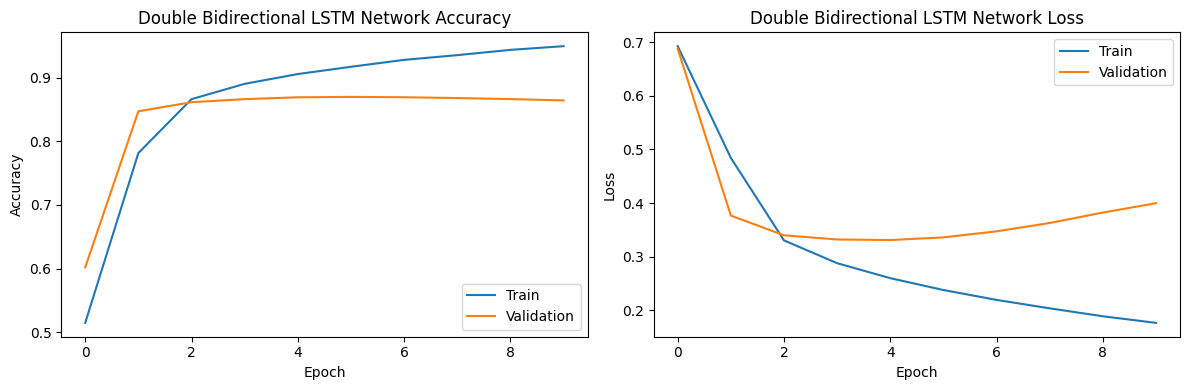

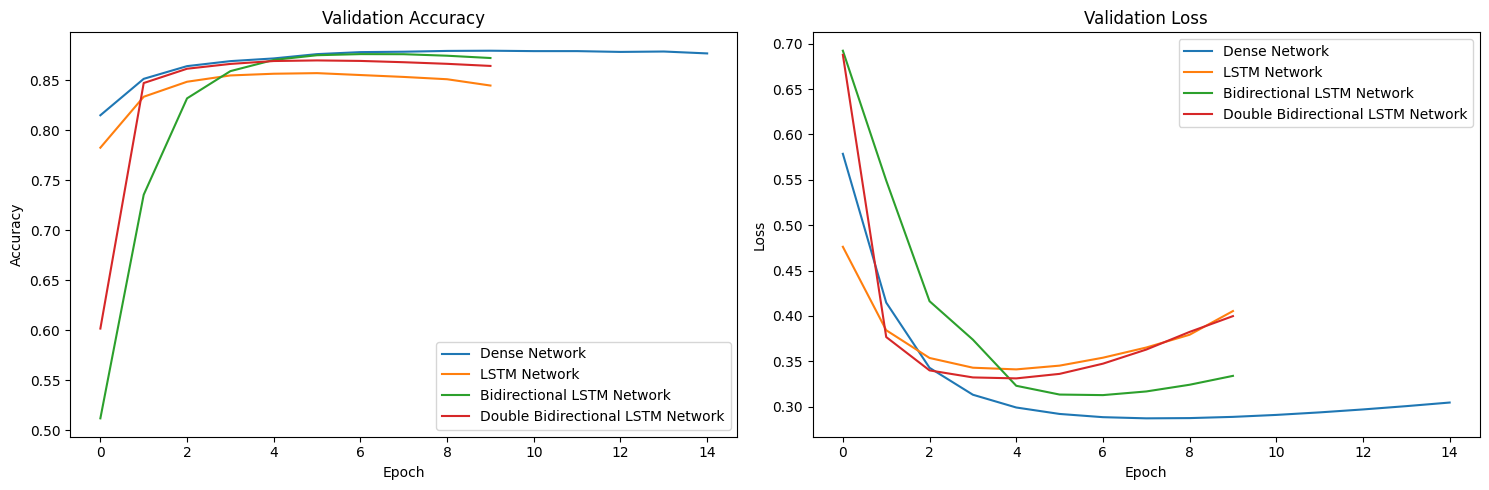


Test predictions:

Text: this film was absolutely terrible the worst acting i have seen
  Dense Network: 0.0741 (Negative)
  LSTM Network: 0.0179 (Negative)
  Bidirectional LSTM Network: 0.0800 (Negative)
  Double Bidirectional LSTM Network: 0.0227 (Negative)

Text: a masterpiece of cinema with outstanding performances and direction
  Dense Network: 0.9119 (Positive)
  LSTM Network: 0.9879 (Positive)
  Bidirectional LSTM Network: 0.9244 (Positive)
  Double Bidirectional LSTM Network: 0.9609 (Positive)

Text: neither good nor bad just a mediocre film that passes the time
  Dense Network: 0.2011 (Negative)
  LSTM Network: 0.0475 (Negative)
  Bidirectional LSTM Network: 0.0930 (Negative)
  Double Bidirectional LSTM Network: 0.0606 (Negative)

Model Performance Summary:
                                   final_train_acc  final_val_acc  \
Dense Network                               0.9306         0.8767   
LSTM Network                                0.9352         0.8446   
Bidirectional L

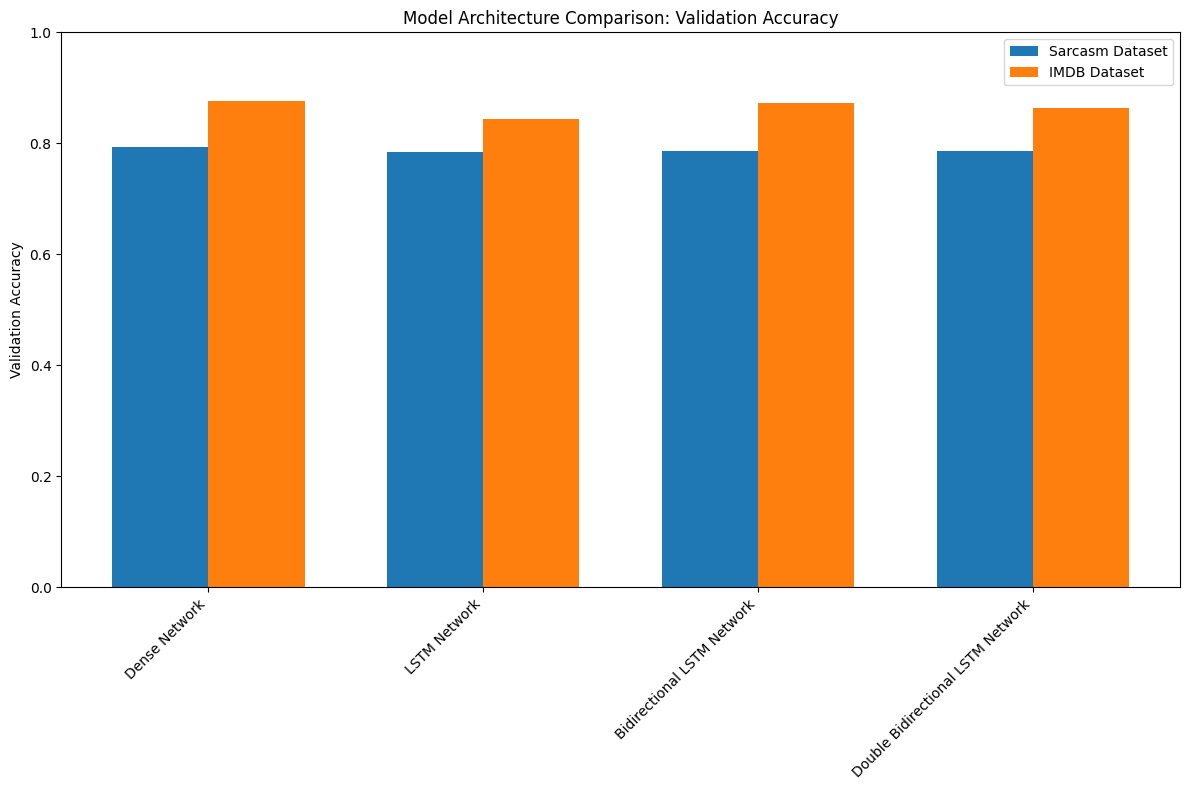


Comparison complete! Review the results and charts above.


In [7]:
#Validation code
#Do not change the code in this cell
#NOTE - This will take a substantial amount of time to run through
#       all models and both datasets.  You may partition the runs to debug individual models if needed.

# Ensure helper functions are available by executing the cell
# containing set_seeds, generate_temperature_data, etc.
# If you have modified the notebook structure and set_seeds is in a different cell,
# please adjust accordingly.
try:
    set_seeds(42) # Check if set_seeds is defined
except NameError:
    print("Helper functions not loaded. Please run the cell containing helper functions first.")
    # You might add code here to programmatically run the cell if desired,
    # but for now, we assume manual execution of the preceding cell.
    raise # Re-raise the error to stop execution if helper functions are missing


# Generate a model creator
def get_model_creator(model_name, embedding_dims):
    """Returns the appropriate model creation function with the right embedding dimension"""
    def creator(vocab_size):
        embedding_dim = embedding_dims[model_name]
        if model_name == "Dense Network":
            return create_dense_model(vocab_size, embedding_dim)
        elif model_name == "LSTM Network":
            return create_lstm_model(vocab_size, embedding_dim)
        elif model_name == "Bidirectional LSTM Network":
            return create_bidirectional_lstm_model(vocab_size, embedding_dim)
        elif model_name == "Double Bidirectional LSTM Network":
            return create_double_bidirectional_lstm_model(vocab_size, embedding_dim)
    return creator


# Run the experiment on a specific dataset
def run_architecture_comparison(dataset_name, max_length=100, vocab_size=10000,
                               embedding_dims=None, epochs_config=None, batch_size=32,
                               learning_rates=None):
    """Run comparison of different architectures on a specified dataset"""
    set_seeds()  # Set seeds for reproducibility

    print("\nInitial configuration:")
    print(f"Learning rates: {learning_rates}")
    print(f"Embedding dimensions: {embedding_dims}")
    print(f"Epochs config: {epochs_config}")

    # Default configs if none provided
    if embedding_dims is None:
        embedding_dims = {
            "Dense Network": 16,
            "LSTM Network": 64,
            "Bidirectional LSTM Network": 64,
            "Double Bidirectional LSTM Network": 64
        }

    if epochs_config is None:
        epochs_config = {
            "Dense Network": 10,
            "LSTM Network": 10,
            "Bidirectional LSTM Network": 10,
            "Double Bidirectional LSTM Network": 10
        }

    if learning_rates is None:
        learning_rates = {
            "Dense Network": 0.0001,
            "LSTM Network": 0.00001,  # Default if not overridden
            "Bidirectional LSTM Network": 0.00001,
            "Double Bidirectional LSTM Network": 0.00001
        }

    print("\nFinal configuration after defaults:")
    print(f"Learning rates: {learning_rates}")
    print(f"Embedding dimensions: {embedding_dims}")
    print(f"Epochs config: {epochs_config}")

    print(f"\n{'='*50}")
    print(f"Running Experiment on {dataset_name} Dataset")
    print(f"{'='*50}")

    # Load dataset
    if dataset_name.lower() == "sarcasm":
        print("Loading Sarcasm dataset...")
        texts, labels = load_sarcasm_dataset()
    elif dataset_name.lower() == "imdb":
        print("Loading IMDB dataset...")
        texts, labels = load_imdb_dataset(num_words=vocab_size)
    else:
        raise ValueError(f"Unknown dataset: {dataset_name}")

    # Preprocess data
    print("Preprocessing data...")
    padded_sequences, labels, tokenizer = preprocess_data(
        texts,
        labels,
        max_length=max_length,
        vocab_size=vocab_size
    )

    # Split into train and validation sets (80/20)
    train_size = int(len(padded_sequences) * 0.8)
    train_sequences = padded_sequences[:train_size]
    train_labels = labels[:train_size]
    val_sequences = padded_sequences[train_size:]
    val_labels = labels[train_size:]

    print(f"Training set size: {len(train_sequences)}")
    print(f"Validation set size: {len(val_sequences)}")

    # Model names
    model_names_list = [
        "Dense Network",
        "LSTM Network",
        "Bidirectional LSTM Network",
        "Double Bidirectional LSTM Network"
    ]

    histories = []
    trained_models = []
    model_names = []
    training_times = []
    metrics = {}

    for name in model_names_list:
        # Get the model creator with the right embedding dimension
        creator = get_model_creator(name, embedding_dims)

        print(f"\nTraining {name}...")
        print(f"Embedding dimension: {embedding_dims[name]}")
        model = creator(vocab_size)

        # Get learning rate and epochs for this model
        lr = learning_rates[name]
        model_epochs = epochs_config[name]
        print(f"Using learning rate: {lr} for {name}")
        print(f"Training for {model_epochs} epochs")

        history, trained_model, train_time = train_model(
            model,
            train_sequences,
            train_labels,
            val_sequences,
            val_labels,
            epochs=model_epochs,
            batch_size=batch_size,
            learning_rate=lr,
            model_name=name
        )

        # Plot individual training history
        plot_training_history(history, model_name=name)

        # Save model info
        histories.append(history)
        trained_models.append(trained_model)
        model_names.append(name)
        training_times.append(train_time)

        # Save metrics
        metrics[name] = {
            'final_train_acc': history.history['accuracy'][-1],
            'final_val_acc': history.history['val_accuracy'][-1],
            'best_val_acc': max(history.history['val_accuracy']),
            'final_train_loss': history.history['loss'][-1],
            'final_val_loss': history.history['val_loss'][-1],
            'training_time': train_time
        }

    # Plot model comparison
    plot_model_comparison(histories, model_names)

    # Test on sample examples
    if dataset_name.lower() == "sarcasm":
        test_texts = [
            "Scientists cure cancer, world peace achieved",
            "Local man wins lottery, plans to spend it all on cat food",
            "Breaking: Water is wet, scientists confirm"
        ]
    else:  # IMDB
        test_texts = [
            "this film was absolutely terrible the worst acting i have seen",
            "a masterpiece of cinema with outstanding performances and direction",
            "neither good nor bad just a mediocre film that passes the time"
        ]

    # Preprocess test texts
    test_sequences = tokenizer.texts_to_sequences(test_texts)
    test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

    # Make predictions with each model
    print("\nTest predictions:")
    for text in test_texts:
        print(f"\nText: {text}")
        for model, name in zip(trained_models, model_names):
            single_sequence = tokenizer.texts_to_sequences([text])
            single_padded = pad_sequences(single_sequence, maxlen=max_length, padding='post', truncating='post')
            prediction = model.predict(single_padded, verbose=0)
            pred_class = "Positive" if prediction[0][0] > 0.5 else "Negative"
            print(f"  {name}: {prediction[0][0]:.4f} ({pred_class})")

    # Create summary table
    summary_df = pd.DataFrame(metrics).T
    summary_df = summary_df.round(4)
    print("\nModel Performance Summary:")
    print(summary_df)

    # Return the results
    return {
        'histories': histories,
        'models': trained_models,
        'model_names': model_names,
        'metrics': metrics,
        'summary': summary_df,
        'tokenizer': tokenizer
    }

def main():
    """Main function to run the architecture comparison on both datasets"""
    # Set configuration parameters
    MAX_LENGTH = 100
    VOCAB_SIZE = 10000

    # Architecture-specific configurations
    # These can be adjusted based on the dataset and model architecture
    sarcasm_configs = {
        "embedding_dim": {
            "Dense Network": 16,
            "LSTM Network": 64,
            "Bidirectional LSTM Network": 64,
            "Double Bidirectional LSTM Network": 64
        },
        "epochs": {
            "Dense Network": 30,
            "LSTM Network": 20,
            "Bidirectional LSTM Network": 15,
            "Double Bidirectional LSTM Network": 15
        },
        "learning_rates": {
            "Dense Network": 0.0001,
            "LSTM Network": 0.00001,
            "Bidirectional LSTM Network": 0.00001,
            "Double Bidirectional LSTM Network": 0.00001
        }
    }

    # Print configurations being passed
    print("\nSarcasm dataset configurations:")
    print(f"Learning rates: {sarcasm_configs['learning_rates']}")
    print(f"Embedding dimensions: {sarcasm_configs['embedding_dim']}")
    print(f"Epochs: {sarcasm_configs['epochs']}")

    imdb_configs = {
        "embedding_dim": {
            "Dense Network": 32,
            "LSTM Network": 64,
            "Bidirectional LSTM Network": 64,
            "Double Bidirectional LSTM Network": 64
        },
        "epochs": {
            "Dense Network": 15,
            "LSTM Network": 10,
            "Bidirectional LSTM Network": 10,
            "Double Bidirectional LSTM Network": 10
        },
        "learning_rates": {
            "Dense Network": 0.0001,
            "LSTM Network": 0.00001,
            "Bidirectional LSTM Network": 0.00001,
            "Double Bidirectional LSTM Network": 0.00001
        }
    }

    BATCH_SIZE = 32

    # Run comparison on Sarcasm dataset
    print("\nRunning comparison on Sarcasm dataset with optimized hyperparameters:")
    for model, embedding_dim in sarcasm_configs["embedding_dim"].items():
        print(f"  {model}: embedding_dim={embedding_dim}, epochs={sarcasm_configs['epochs'][model]}, lr={sarcasm_configs['learning_rates'][model]}")

    sarcasm_results = run_architecture_comparison(
        "sarcasm",
        max_length=MAX_LENGTH,
        vocab_size=VOCAB_SIZE,
        embedding_dims=sarcasm_configs["embedding_dim"],
        epochs_config=sarcasm_configs["epochs"],
        batch_size=BATCH_SIZE,
        learning_rates=sarcasm_configs["learning_rates"]
    )

    # Run comparison on IMDB dataset
    print("\nRunning comparison on IMDB dataset with optimized hyperparameters:")
    for model, embedding_dim in imdb_configs["embedding_dim"].items():
        print(f"  {model}: embedding_dim={embedding_dim}, epochs={imdb_configs['epochs'][model]}, lr={imdb_configs['learning_rates'][model]}")

    imdb_results = run_architecture_comparison(
        "imdb",
        max_length=MAX_LENGTH,
        vocab_size=VOCAB_SIZE,
        embedding_dims=imdb_configs["embedding_dim"],
        epochs_config=imdb_configs["epochs"],
        batch_size=BATCH_SIZE,
        learning_rates=imdb_configs["learning_rates"]
    )

    # Create combined metrics visualization
    fig, ax = plt.subplots(figsize=(12, 8))

    # Extract data for plotting
    model_names = sarcasm_results['model_names']
    sarcasm_acc = [sarcasm_results['metrics'][name]['final_val_acc'] for name in model_names]
    imdb_acc = [imdb_results['metrics'][name]['final_val_acc'] for name in model_names]

    x = np.arange(len(model_names))
    width = 0.35

    ax.bar(x - width/2, sarcasm_acc, width, label='Sarcasm Dataset')
    ax.bar(x + width/2, imdb_acc, width, label='IMDB Dataset')

    ax.set_title('Model Architecture Comparison: Validation Accuracy')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha='right')
    ax.set_ylim(0, 1)
    ax.set_ylabel('Validation Accuracy')
    ax.legend()

    plt.tight_layout()
    plt.show()

    print("\nComparison complete! Review the results and charts above.")

    return sarcasm_results, imdb_results

if __name__ == "__main__":
    main()

### Part 2 Reflection Questions

1. Model Complexity vs. Performance   
The Dense Network outperformed more complex architectures on both datasets. What might explain this counterintuitive result, and what implications does this have for the principle that "more complex models yield better results"?

2. Training-Validation Gap Analysis   
The LSTM Network on the sarcasm dataset showed a large gap between training accuracy and validation accuracy.  What does this pattern suggest, and what techniques could you implement to address this issue?

3. Task Difficulty Comparison   
All models performed better on the IMDB dataset than on the sarcasm dataset. What characteristics of sarcasm might make it inherently more difficult to detect compared to sentiment analysis?

4. Computational Efficiency Analysis   
The training times varied dramatically between architectures. Considering the performance results, analyze the trade-offs between model complexity, computational resources, and accuracy. When might you choose a simpler model despite having resources for more complex ones?

5. Architecture Enhancement Proposal   
Based on these results, propose a modified architecture or approach that might improve performance on the sarcasm detection task while maintaining reasonable computational efficiency. Justify your design choices.

**Reflections:**

1. Model Complexity vs. Performance
   The Dense Network outperformed more complex architectures on both datasets. What might explain this counterintuitive result, and what implications does this have for the principle that "more complex models yield better results"?

   **Ans:**  Although Dense is "simplier" than the more complexed LSTM model, possibly the dataset of the IMDB doesn't have time-series characteristics, and using Dense would be enough and more efficient. So it is not true that complex models always yield better result. There's a trade-off between complexity and efficiency.

2. Training-Validation Gap Analysis
   The LSTM Network on the sarcasm dataset showed a large gap between training accuracy and validation accuracy. What does this pattern suggest, and what techniques could you implement to address this issue?

   **Ans:**  It shows the over-fitting problem. To mitigate the over-fitting problem, we can add the Dropout layer, or we can set the early stopping.

3. Task Difficulty Comparison
   All models performed better on the IMDB dataset than on the sarcasm dataset. What characteristics of sarcasm might make it inherently more difficult to detect compared to sentiment analysis?

   **Ans:** I think a possible reason is that the reviews of IMDB have stronger or more intense sentiments, while the sentences on the sarcasm dataset have more ambigue emotions. So it makes the sarcasm dataset harder to detect.

4. Computational Efficiency Analysis
   The training times varied dramatically between architectures. Considering the performance results, analyze the trade-offs between model complexity, computational resources, and accuracy. When might you choose a simpler model despite having resources for more complex ones?

   **Ans:** A more complex model may requires larger computational resources, and when the dataset itself is large and complex, a more sophiscated model may bring higher accuracy. However, sometimes when the data itself is simple, and a simple model can provides good accuracy. In this case, we don't need to use a very complex model, even if we have enough resources.

5. Architecture Enhancement Proposal
   Based on these results, propose a modified architecture or approach that might improve performance on the sarcasm detection task while maintaining reasonable computational efficiency. Justify your design choices.

   **Ans:** Perhaps I would include the Attention model, which is introduced in the following lectures. This design may be better than having multiple layers of LSTM.

## Part 3:  Dense versus LSTM on longer documents   

You should have noticed with the sarcasm and IMDB datasets, that the LSTM networks required more computational resources (e.g. took longer to train) but didn't substantially improve performance over the Dense networks.  This is because the datasets were relatively short headlines (sarcasm) and reviews (IMDB).  
As such, an LSTM should outperform Dense networks with longer document classification tasks.

In this part, your task will be to find a dataset that demonstrates the benefit of LSTM Networks versus Dense Networks in NLP using the same code you created for the sarcasm and IMDB models.

- You must use the code you created in Part 2 to process the dataset you find.  If you had to modify the code used in Part 2 for any reason to make it work with the new datasets, provide a clear description of what was changed and why.
- Create a 1-2 page document describing the dataset you used and the performance results with appropriate visualizations and conclusions.

Submission requirements.  Turn in:
- Your code (this notebook)
- Your document from the description above.


In [ ]:
#YOUR CODE HERE#

Sorry that I haven't done this part yet!